In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-power-generation-data/Plant2_Weather_filtered.csv
/kaggle/input/solar-power-generation-data/Plant1_filtered.csv
/kaggle/input/solar-power-generation-data/Plant2_filtered.csv
/kaggle/input/solar-power-generation-data/Plant1_Weather_filtered.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

p1_weather = pd.read_csv('/kaggle/input/solar-power-generation-data/Plant1_Weather_filtered.csv')
p1_gen = pd.read_csv('/kaggle/input/solar-power-generation-data/Plant1_filtered.csv')

p2_weather = pd.read_csv('/kaggle/input/solar-power-generation-data/Plant2_Weather_filtered.csv')
p2_gen = pd.read_csv('/kaggle/input/solar-power-generation-data/Plant2_filtered.csv')


# Solar Energy Analysis Project

## Introduction

Solar energy is a sustainable and renewable energy source. Monitoring and analyzing solar power generation is essential to optimize plant performance and efficiency.

This project analyzes data from **two solar power plants**. It includes:

- **Generation Data**: DC power, AC power, daily yield, total yield.
- **Weather Data**: Ambient temperature, module temperature, solar irradiation.

Goals:

1. Explore power generation trends over time.
2. Analyze the impact of weather conditions on power output.
3. Compare performance between the two plants.
4. Visualize insights using static and interactive plots.
5. Create a dashboard-style summary of solar plant performance.


## 1. Import Libararies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_style('whitegrid')


## 2. Load Data

In [4]:
# Load Plant 1 data
plant1_gen = pd.read_csv('/kaggle/input/solar-power-generation-data/Plant1_filtered.csv', parse_dates=['DATE_TIME'])
plant1_weather = pd.read_csv('/kaggle/input/solar-power-generation-data/Plant1_Weather_filtered.csv', parse_dates=['DATE_TIME'])

# Load Plant 2 data
plant2_gen = pd.read_csv('/kaggle/input/solar-power-generation-data/Plant2_filtered.csv', parse_dates=['DATE_TIME'])
plant2_weather = pd.read_csv('/kaggle/input/solar-power-generation-data/Plant2_Weather_filtered.csv', parse_dates=['DATE_TIME'])


## 4. Inspect Data

In [5]:
# Look at first rows
print(plant1_gen.head())
print(plant1_weather.head())

# Check missing values
print(plant1_gen.isnull().sum())
print(plant1_weather.isnull().sum())



            DATE_TIME  PLANT_ID       SOURCE_KEY   DC_POWER  AC_POWER  \
0 2020-05-15 06:00:00   4135001  1BY6WEcLGh8j5v7  37.142857  3.585714   
1 2020-05-15 06:00:00   4135001  1IF53ai7Xc0U56Y  53.500000  5.162500   
2 2020-05-15 06:00:00   4135001  3PZuoBAID5Wc2HD  58.000000  5.585714   
3 2020-05-15 06:00:00   4135001  7JYdWkrLSPkdwr4  58.428571  5.628571   
4 2020-05-15 06:00:00   4135001  McdE0feGgRqW7Ca  54.375000  5.250000   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  
            DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 05:45:00   4135001  HmiyD2TTLFNqkNe            24.289211   
1 2020-05-15 06:00:00   4135001  HmiyD2TTLFNqkNe            24.088446   
2 2020-05-15 06:15:00   4135001  HmiyD2TTLFNqkNe            24.011635   
3 2020-05-15 06:30:00   4135001  HmiyD2TTLFNqkNe            23.976731   
4 2020-05-15 06:

## 5. Merge Generation and Weather Data

In [6]:
# Merge by DATE_TIME and PLANT_ID
plant1 = pd.merge(plant1_gen, plant1_weather, on=['DATE_TIME','PLANT_ID'], how='left')
plant2 = pd.merge(plant2_gen, plant2_weather, on=['DATE_TIME','PLANT_ID'], how='left')


## 6.Check Merged Data

In [7]:
# Check Merged Data
print(plant1.info())
print(plant2.info())

# Fill missing values if necessary
plant1.fillna(method='ffill', inplace=True)
plant2.fillna(method='ffill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36827 entries, 0 to 36826
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            36827 non-null  datetime64[ns]
 1   PLANT_ID             36827 non-null  int64         
 2   SOURCE_KEY_x         36827 non-null  object        
 3   DC_POWER             36827 non-null  float64       
 4   AC_POWER             36827 non-null  float64       
 5   DAILY_YIELD          36827 non-null  float64       
 6   TOTAL_YIELD          36827 non-null  float64       
 7   SOURCE_KEY_y         36823 non-null  object        
 8   AMBIENT_TEMPERATURE  36823 non-null  float64       
 9   MODULE_TEMPERATURE   36823 non-null  float64       
 10  IRRADIATION          36823 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 3.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32036 entries,

In [8]:
plant1.isna().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [9]:
plant1.info()
plant2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36827 entries, 0 to 36826
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            36827 non-null  datetime64[ns]
 1   PLANT_ID             36827 non-null  int64         
 2   SOURCE_KEY_x         36827 non-null  object        
 3   DC_POWER             36827 non-null  float64       
 4   AC_POWER             36827 non-null  float64       
 5   DAILY_YIELD          36827 non-null  float64       
 6   TOTAL_YIELD          36827 non-null  float64       
 7   SOURCE_KEY_y         36827 non-null  object        
 8   AMBIENT_TEMPERATURE  36827 non-null  float64       
 9   MODULE_TEMPERATURE   36827 non-null  float64       
 10  IRRADIATION          36827 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32036 entries, 0 to

## 7. Feature Engineering

In [10]:
# Calculate efficiency = AC Power / Irradiation
plant1['Efficiency'] = plant1['AC_POWER'] / plant1['IRRADIATION']
plant2['Efficiency'] = plant2['AC_POWER'] / plant2['IRRADIATION']

# Extract date features
for df in [plant1, plant2]:
    df['Year'] = df['DATE_TIME'].dt.year
    df['Month'] = df['DATE_TIME'].dt.month
    df['Day'] = df['DATE_TIME'].dt.day
    df['Hour'] = df['DATE_TIME'].dt.hour


## 8. Exploratory Data Analysis (EDA)

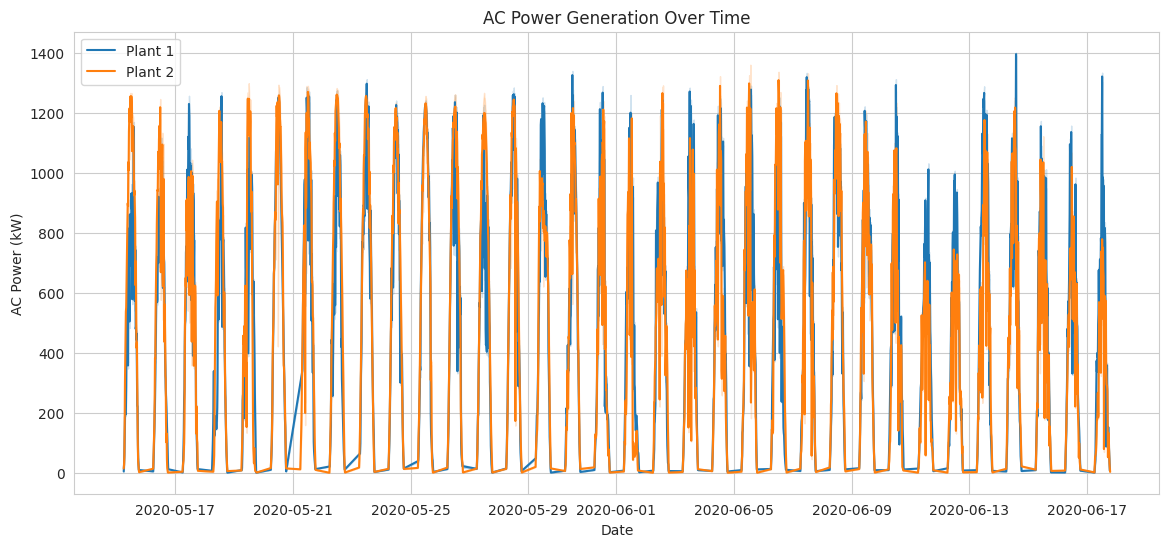

In [11]:
plt.figure(figsize=(14,6))
sns.lineplot(data=plant1, x='DATE_TIME', y='AC_POWER', label='Plant 1')
sns.lineplot(data=plant2, x='DATE_TIME', y='AC_POWER', label='Plant 2')
plt.title('AC Power Generation Over Time')
plt.xlabel('Date')
plt.ylabel('AC Power (kW)')
plt.legend()
plt.show()



## b. Daily Yield Distribution

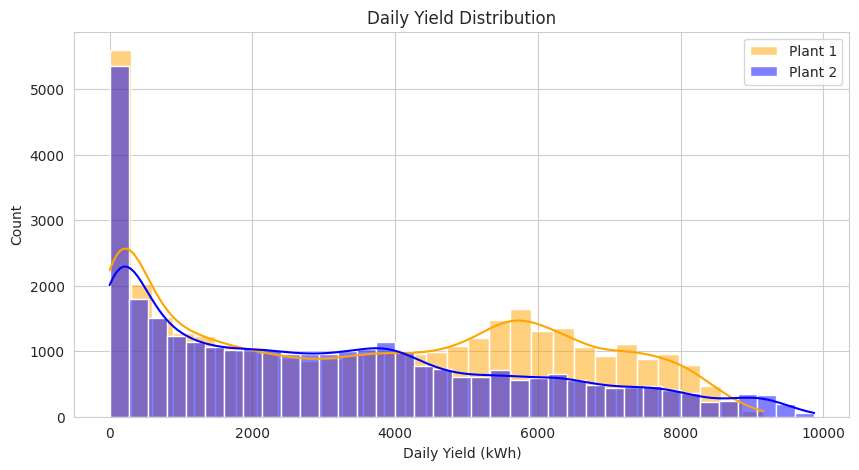

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(plant1['DAILY_YIELD'], kde=True, color='orange', label='Plant 1')
sns.histplot(plant2['DAILY_YIELD'], kde=True, color='blue', label='Plant 2')
plt.title('Daily Yield Distribution')
plt.xlabel('Daily Yield (kWh)')
plt.legend()
plt.show()


## c. Weather Impact on Power

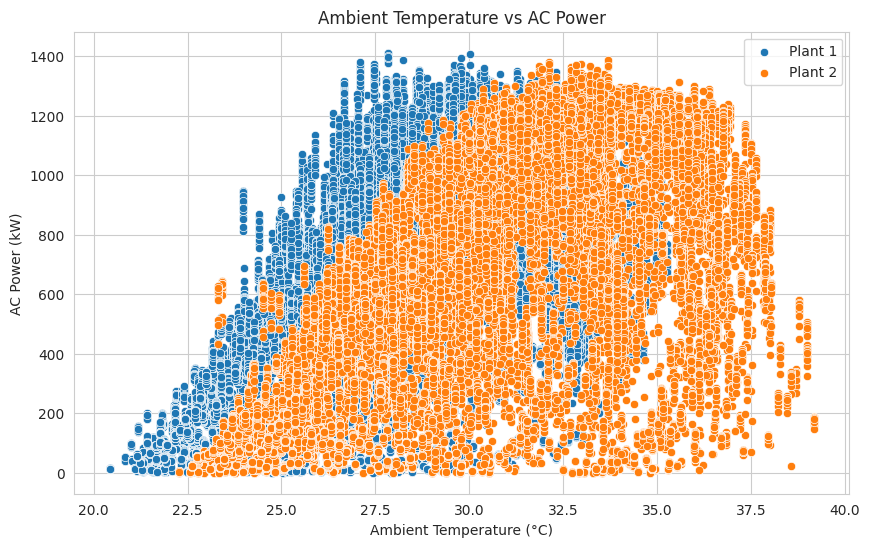

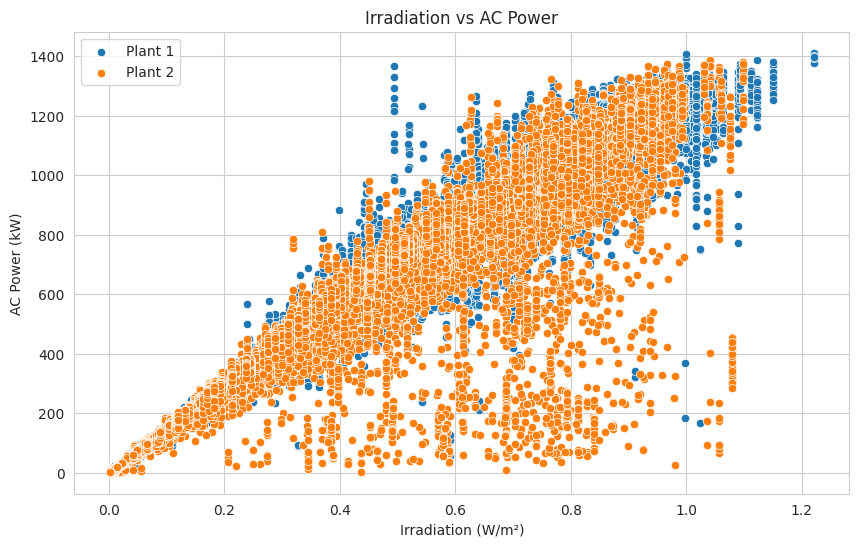

In [13]:
# Ambient Temperature vs AC Power
plt.figure(figsize=(10,6))
sns.scatterplot(data=plant1, x='AMBIENT_TEMPERATURE', y='AC_POWER', label='Plant 1')
sns.scatterplot(data=plant2, x='AMBIENT_TEMPERATURE', y='AC_POWER', label='Plant 2')
plt.title('Ambient Temperature vs AC Power')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('AC Power (kW)')
plt.legend()
plt.show()

# Irradiation vs AC Power
plt.figure(figsize=(10,6))
sns.scatterplot(data=plant1, x='IRRADIATION', y='AC_POWER', label='Plant 1')
sns.scatterplot(data=plant2, x='IRRADIATION', y='AC_POWER', label='Plant 2')
plt.title('Irradiation vs AC Power')
plt.xlabel('Irradiation (W/m²)')
plt.ylabel('AC Power (kW)')
plt.legend()
plt.show()


In [14]:
plant1.info()
plant2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36827 entries, 0 to 36826
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            36827 non-null  datetime64[ns]
 1   PLANT_ID             36827 non-null  int64         
 2   SOURCE_KEY_x         36827 non-null  object        
 3   DC_POWER             36827 non-null  float64       
 4   AC_POWER             36827 non-null  float64       
 5   DAILY_YIELD          36827 non-null  float64       
 6   TOTAL_YIELD          36827 non-null  float64       
 7   SOURCE_KEY_y         36827 non-null  object        
 8   AMBIENT_TEMPERATURE  36827 non-null  float64       
 9   MODULE_TEMPERATURE   36827 non-null  float64       
 10  IRRADIATION          36827 non-null  float64       
 11  Efficiency           36827 non-null  float64       
 12  Year                 36827 non-null  int32         
 13  Month                36827 non-

## 9. Seasonal & Hourly Analysis

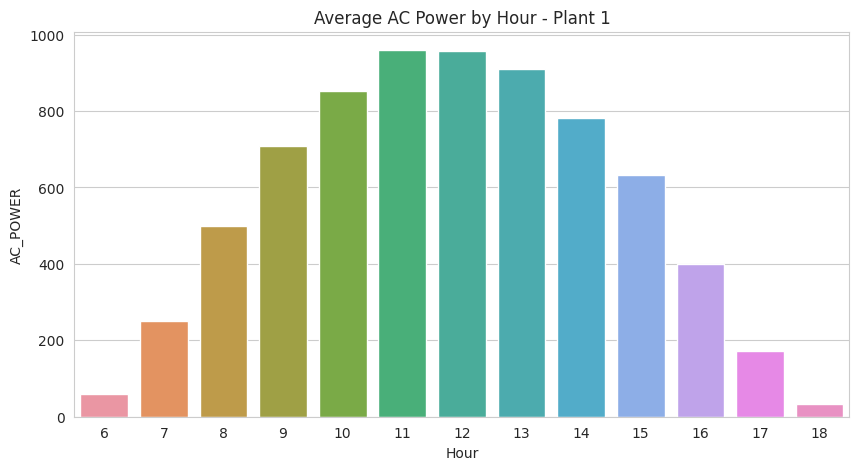

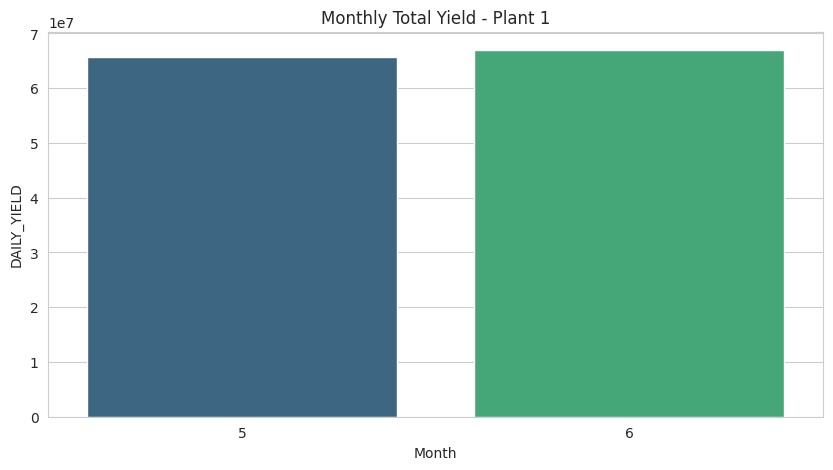

In [15]:
# Average AC Power by Hour
hourly_power = plant1.groupby('Hour')['AC_POWER'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='AC_POWER', data=hourly_power)
plt.title('Average AC Power by Hour - Plant 1')
plt.show()

# Monthly total yield
monthly_yield = plant1.groupby('Month')['DAILY_YIELD'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='DAILY_YIELD', data=monthly_yield, palette='viridis')
plt.title('Monthly Total Yield - Plant 1')
plt.show()


## 10. Dashboard-style Visualization (Interactive)

In [16]:
import plotly.express as px
import pandas as pd

# Ensure necessary columns exist
for df in [plant1, plant2]:
    # Efficiency
    df['Efficiency'] = df['AC_POWER'] / df['IRRADIATION']
    # Month
    df['Month'] = df['DATE_TIME'].dt.month
    # Optional: sample for faster rendering if dataset is large
    if len(df) > 10000:
        df['sample'] = df.index % 10 == 0  # keep ~10% of data
    else:
        df['sample'] = True

# -------------------------------
# 1. AC Power Over Time
# -------------------------------
fig_ac = px.line(plant1[plant1['sample']], x='DATE_TIME', y='AC_POWER', 
                 title='Plant 1 AC Power Over Time', labels={'AC_POWER':'AC Power (kW)'})
fig_ac2 = px.line(plant2[plant2['sample']], x='DATE_TIME', y='AC_POWER', 
                  title='Plant 2 AC Power Over Time', labels={'AC_POWER':'AC Power (kW)'})
fig_ac.show()
fig_ac2.show()

# -------------------------------
# 2. Efficiency vs Irradiation
# -------------------------------
fig_eff = px.scatter(plant1[plant1['sample']], x='IRRADIATION', y='Efficiency', 
                     color='MODULE_TEMPERATURE', title='Plant 1 Efficiency vs Irradiation',
                     labels={'IRRADIATION':'Irradiation (W/m²)', 'Efficiency':'Efficiency'})
fig_eff2 = px.scatter(plant2[plant2['sample']], x='IRRADIATION', y='Efficiency', 
                      color='MODULE_TEMPERATURE', title='Plant 2 Efficiency vs Irradiation',
                      labels={'IRRADIATION':'Irradiation (W/m²)', 'Efficiency':'Efficiency'})
fig_eff.show()
fig_eff2.show()

# -------------------------------
# 3. Monthly Total Yield
# -------------------------------
monthly_yield1 = plant1.groupby('Month')['DAILY_YIELD'].sum().reset_index()
monthly_yield2 = plant2.groupby('Month')['DAILY_YIELD'].sum().reset_index()

fig_monthly1 = px.bar(monthly_yield1, x='Month', y='DAILY_YIELD', 
                      title='Plant 1 Monthly Total Yield', labels={'DAILY_YIELD':'Total Yield (kWh)'})
fig_monthly2 = px.bar(monthly_yield2, x='Month', y='DAILY_YIELD', 
                      title='Plant 2 Monthly Total Yield', labels={'DAILY_YIELD':'Total Yield (kWh)'})
fig_monthly1.show()
fig_monthly2.show()


## 11. Key Insights

- Power generation peaks during midday, following daylight patterns.
- AC Power is strongly correlated with solar irradiation and moderately with temperature.
- Efficiency is higher during moderate temperatures with high irradiation.
- Seasonal variations impact monthly yield and plant performance.


In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sampling for faster rendering
for df in [plant1, plant2]:
    if len(df) > 10000:
        df['sample'] = df.index % 10 == 0
    else:
        df['sample'] = True

# Monthly Yield
monthly_yield1 = plant1.groupby('Month')['DAILY_YIELD'].sum().reset_index()
monthly_yield2 = plant2.groupby('Month')['DAILY_YIELD'].sum().reset_index()

# Create Subplots: 3 rows, 2 columns
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        "Plant 1 AC Power Over Time", "Plant 2 AC Power Over Time",
        "Plant 1 Efficiency vs Irradiation", "Plant 2 Efficiency vs Irradiation",
        "Plant 1 Monthly Total Yield", "Plant 2 Monthly Total Yield"
    )
)

# -------------------------------
# AC Power Time Series
# -------------------------------
fig.add_trace(go.Scatter(x=plant1[plant1['sample']]['DATE_TIME'], 
                         y=plant1[plant1['sample']]['AC_POWER'], mode='lines', name='Plant 1 AC Power'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=plant2[plant2['sample']]['DATE_TIME'], 
                         y=plant2[plant2['sample']]['AC_POWER'], mode='lines', name='Plant 2 AC Power'),
              row=1, col=2)

# -------------------------------
# Efficiency vs Irradiation
# -------------------------------
fig.add_trace(go.Scatter(x=plant1[plant1['sample']]['IRRADIATION'], 
                         y=plant1[plant1['sample']]['Efficiency'], mode='markers',
                         marker=dict(color=plant1[plant1['sample']]['MODULE_TEMPERATURE'], showscale=True),
                         name='Plant 1 Efficiency'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=plant2[plant2['sample']]['IRRADIATION'], 
                         y=plant2[plant2['sample']]['Efficiency'], mode='markers',
                         marker=dict(color=plant2[plant2['sample']]['MODULE_TEMPERATURE'], showscale=True),
                         name='Plant 2 Efficiency'),
              row=2, col=2)

# -------------------------------
# Monthly Total Yield
# -------------------------------
fig.add_trace(go.Bar(x=monthly_yield1['Month'], y=monthly_yield1['DAILY_YIELD'], name='Plant 1 Monthly Yield'),
              row=3, col=1)

fig.add_trace(go.Bar(x=monthly_yield2['Month'], y=monthly_yield2['DAILY_YIELD'], name='Plant 2 Monthly Yield'),
              row=3, col=2)

# Update layout
fig.update_layout(height=1200, width=1200, title_text="Solar Energy Dashboard: Plant 1 & Plant 2", showlegend=False)
fig.update_xaxes(title_text="Date / Irradiation / Month")
fig.update_yaxes(title_text="AC Power / Efficiency / Yield")

fig.show()
